<a href="https://colab.research.google.com/github/akshita119/vehicleNumberPlateRecognition/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install ultralytics
! pip install opencv-python
! pip install matplotlib
from google.colab import files
import zipfile
import os
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 879.0/879.0 kB 14.8 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [2]:
print("upload images zip file:")
uploaded = files.upload()

upload images zip file:


Saving ANPR_Test.zip to ANPR_Test.zip


In [3]:
zip_file = [f for f in uploaded.keys() if f.endswith('.zip')][0]
extract_dir = '/content/photos'
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

In [4]:
uploaded = files.upload()  # upload model

Saving best.pt to best.pt


In [5]:
model = YOLO('/content/best.pt')
image_paths = [os.path.join("/content/photos/ANPR Test", img) for img in os.listdir("/content/photos/ANPR Test") if img.endswith(('.jpg', '.jpeg', '.png'))]


0: 416x640 2 number_plates, 141.1ms
Speed: 4.6ms preprocess, 141.1ms inference, 0.9ms postprocess per image at shape (1, 3, 416, 640)


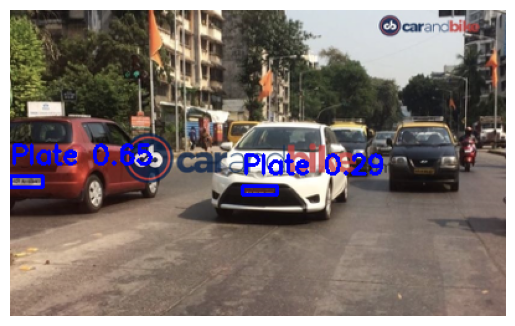


0: 384x640 1 number_plate, 143.6ms
Speed: 3.3ms preprocess, 143.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


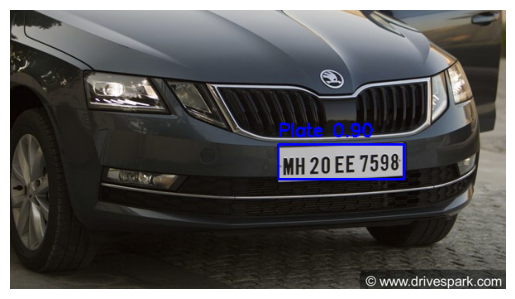


0: 416x640 1 number_plate, 142.9ms
Speed: 3.3ms preprocess, 142.9ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 640)


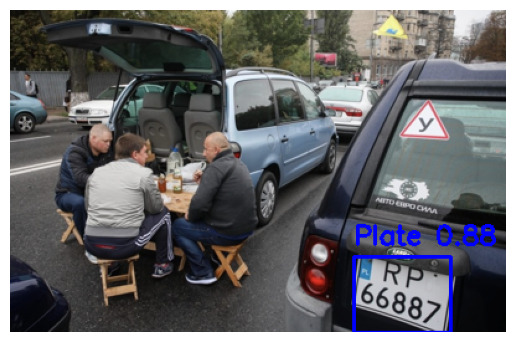


0: 448x640 1 number_plate, 187.3ms
Speed: 3.4ms preprocess, 187.3ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)


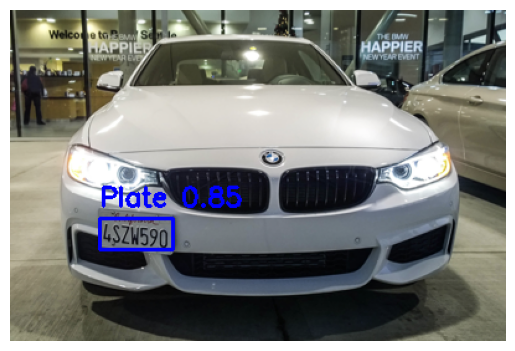


0: 640x640 1 number_plate, 232.1ms
Speed: 5.0ms preprocess, 232.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


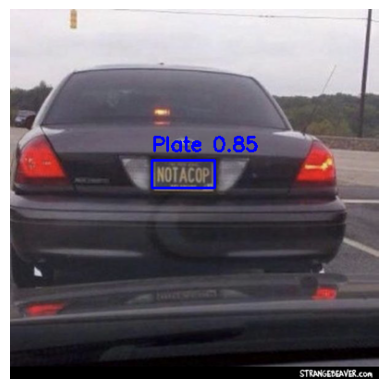


0: 480x640 1 number_plate, 203.5ms
Speed: 3.8ms preprocess, 203.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


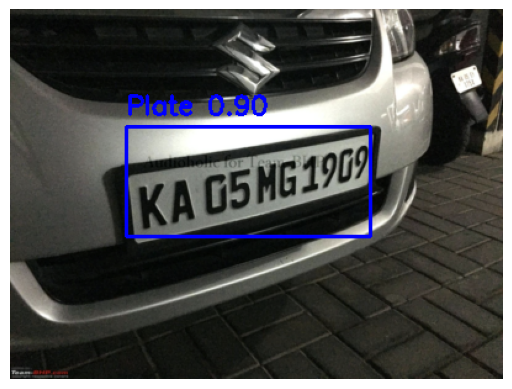


0: 448x640 2 number_plates, 181.9ms
Speed: 3.4ms preprocess, 181.9ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)


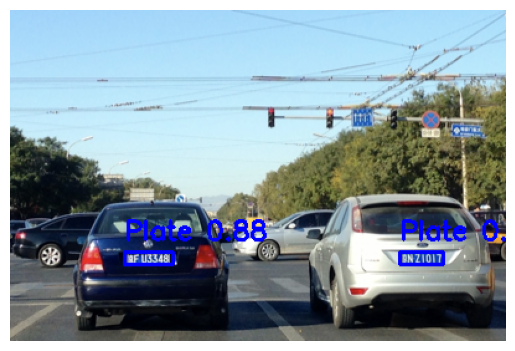


0: 640x640 1 number_plate, 272.6ms
Speed: 5.0ms preprocess, 272.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


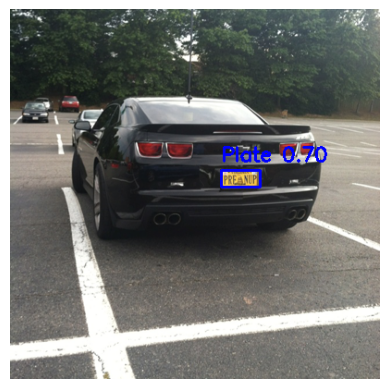


0: 320x640 1 number_plate, 149.0ms
Speed: 2.6ms preprocess, 149.0ms inference, 0.9ms postprocess per image at shape (1, 3, 320, 640)


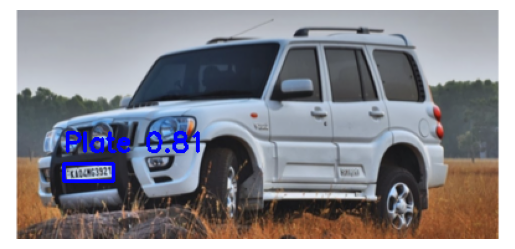

In [13]:
for image_path in image_paths:
    image = cv2.imread(image_path)
    results = model.predict(image)

    for res in results:
        for box in res.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), thickness=2)
            label = f"Plate {box.conf[0]:.2f}"
            cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), thickness=2)


    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()